In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Autoencoders

## Background

Audoencoders create a lower-dimensional latent representation of the data, in such a way that there is minimal loss of information. Let $\mathbf{X \in \mathbb{R}^n}$ be a n-dimensional input. Then the encoder part is a mapping function 
 
 $$f: \mathbf{X} \mapsto \mathbf{h}$$, 
 
 where $ \mathbf{h} \in \mathbb{R}^d $, and $ d << n$ (i.e., $\mathbf{h}$ is a much lower dimensional vector space representation of the input.)
 
 The mapping function is realized through one or more hidden layers of neurons. 
 
 <img src="./Autoencoder_schema.png" alt="Autoencoder Architecture" width="600px" />
 (Image Credit: Wikipedia)
 
 In the simplest case of there being only one hidden layer, that of the latent representation, and the activation function is the identity function 
 
 $$ \sigma (z) = z $$
 
 then the transformation is linear. One can show that this is equivalent to a PCA dimensionality reduction.
 
 Typically, however, autoencoders use many hidden layers, and use nonlinear activation functions in order to capture non-linear mappings to a lower-dimensional space.
 
 The decoder is usually a mirror opposite of the encoder, and tries to recover the original representation of the input in $\mathbb{R}^n$ from the latent representation $\mathbf{h}$. As such it is a different mapping function $g(z)$:
 $$g: \mathbf{h} \mapsto \mathbf{X'}$$.
 
 
 The complete autoencoder therefore represents a composite function $g\circ f$:
 
 $$\mathbf{X'} = g ( f (\mathbf{X}))$$.
 
 ### Loss function
 
 The loss-function is the usually the mean squared error (MSE), where the error is the residual difference between the input and the output. 
 $$
 \mathcal{L} = \sum_{i=1}^n (\mathbf{X_i} - \mathbf{X'_i})^2 
 $$
 
 Minimizing this leads to the autoencoder training to restore an input as closely as possible. In the process, it ends up with a latent representation $\mathbf{h}$ of the inputs.
 
 ### Variants of the autoencoder
 
 There is a rich variety of autoencoders, such as the regularized autoencoders, the sparse autoencoders, the denoising autoencoders, etc. And then there is a different type of autoencoders altogether that are generative, and use variational inference. These are the variational autoencoders. We covered many of these in our theory sessions in detail.
 
 
 ## The standard form of the autoencoder
 
 Let us start our lab with the standard form of the autoencoder. This encoder is implemented in the class:
 
 `svlearn.autoencoder.BaseAutoEncoder` 
 
 and can be found in the `DeepLearningWorkshop/svlearn/autoencoder/` directory of your project. Study it carefully, and observe the following:
 
**OBSERVATIONS**

* the encoder and the decoder are laterally symmetric opposites
* there are an odd number of layers
* it is composed entirely of fully connected (Linear) layers
* the activation function for internal layers in `ReLu`
* we are using the standard MSE loss function here
* we are using the `MNIST` dataset for this exercise
* the number of hidden layers can be configured in the constructor of the `BaseAutoencoder` class, and is specified through the parameter `hidden_layers`
* the dimensionality of the latent vector space representation is configured in the constructor, through the parameter `latent_dimension`.
* we have used a `Tanh` activation function in the output layer. Can you guess why?



### Imports

In [2]:

from svlearn.autoencoder.vanilla_encoder import ( BaseAutoencoder, DenoisingAutoencoder, ConvAutoencoder, DenoisingConvAutoencoder )
import matplotlib.pyplot as plt
import ipyplot

### Training the autoencoder

Let us first train the autoencoder with an 16-dimensional latent space representation. `MNIST` images are 28x28 pixels, with a single channel (black-and-white), so our input dimension of the flattened image is 28x28 = 784
. We will not provide the hidden dimension, since our autoencoder implementation will infer a good additional hidden layer in the encoder and decoder.

```
def __init__(self, input_dimension: int, latent_dimension: int, hidden_layers: List[int] = None) -> None:
```
 
Let us instantiate the autoencoder, and see its structure:

In [3]:
ae = BaseAutoencoder(input_dimension=28 ** 2, latent_dimension=16)
print(ae)

Since no hidden layers were provided, one hidden layer of size:64 has been added
BaseAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=784, bias=True)
    (3): Tanh()
  )
  (loss_function): MSELoss()
)
	Input-Dimension:         784
	Hidden Layer Dimensions: [64]
	Latent Dimension:        16


From the above, we see that the input layer has 784 dimensions, and the latent dimension is 16. Our implementation has inferred that a good dimensionality for a single hidden layer is 64 (it is the middle of the log-linear scale from input to latent dimensions). The network uses `ReLU` everywhere internally, and `Tanh` for the output layer.

Let us move forward to training the autoencoder. By default, our implementation will train it for 5 epochs, and uses a mini-batch size of 32 records at a time. The learning rate is 0.001. By default, the output images will be dumped in a subdirectory of the notebook called `output_images`. Each of thse are configurable hyper-parameters.

In [4]:
epochs = 1
ae.train(epochs=epochs)

sequence:  1875 epoch [ 1 of   1], loss:0.0766
Finished training the autoencoder.


### Loss Plot while training

Let us now look at how the loss varies with each iteration. This gives us a sense of how the learning is progressing.

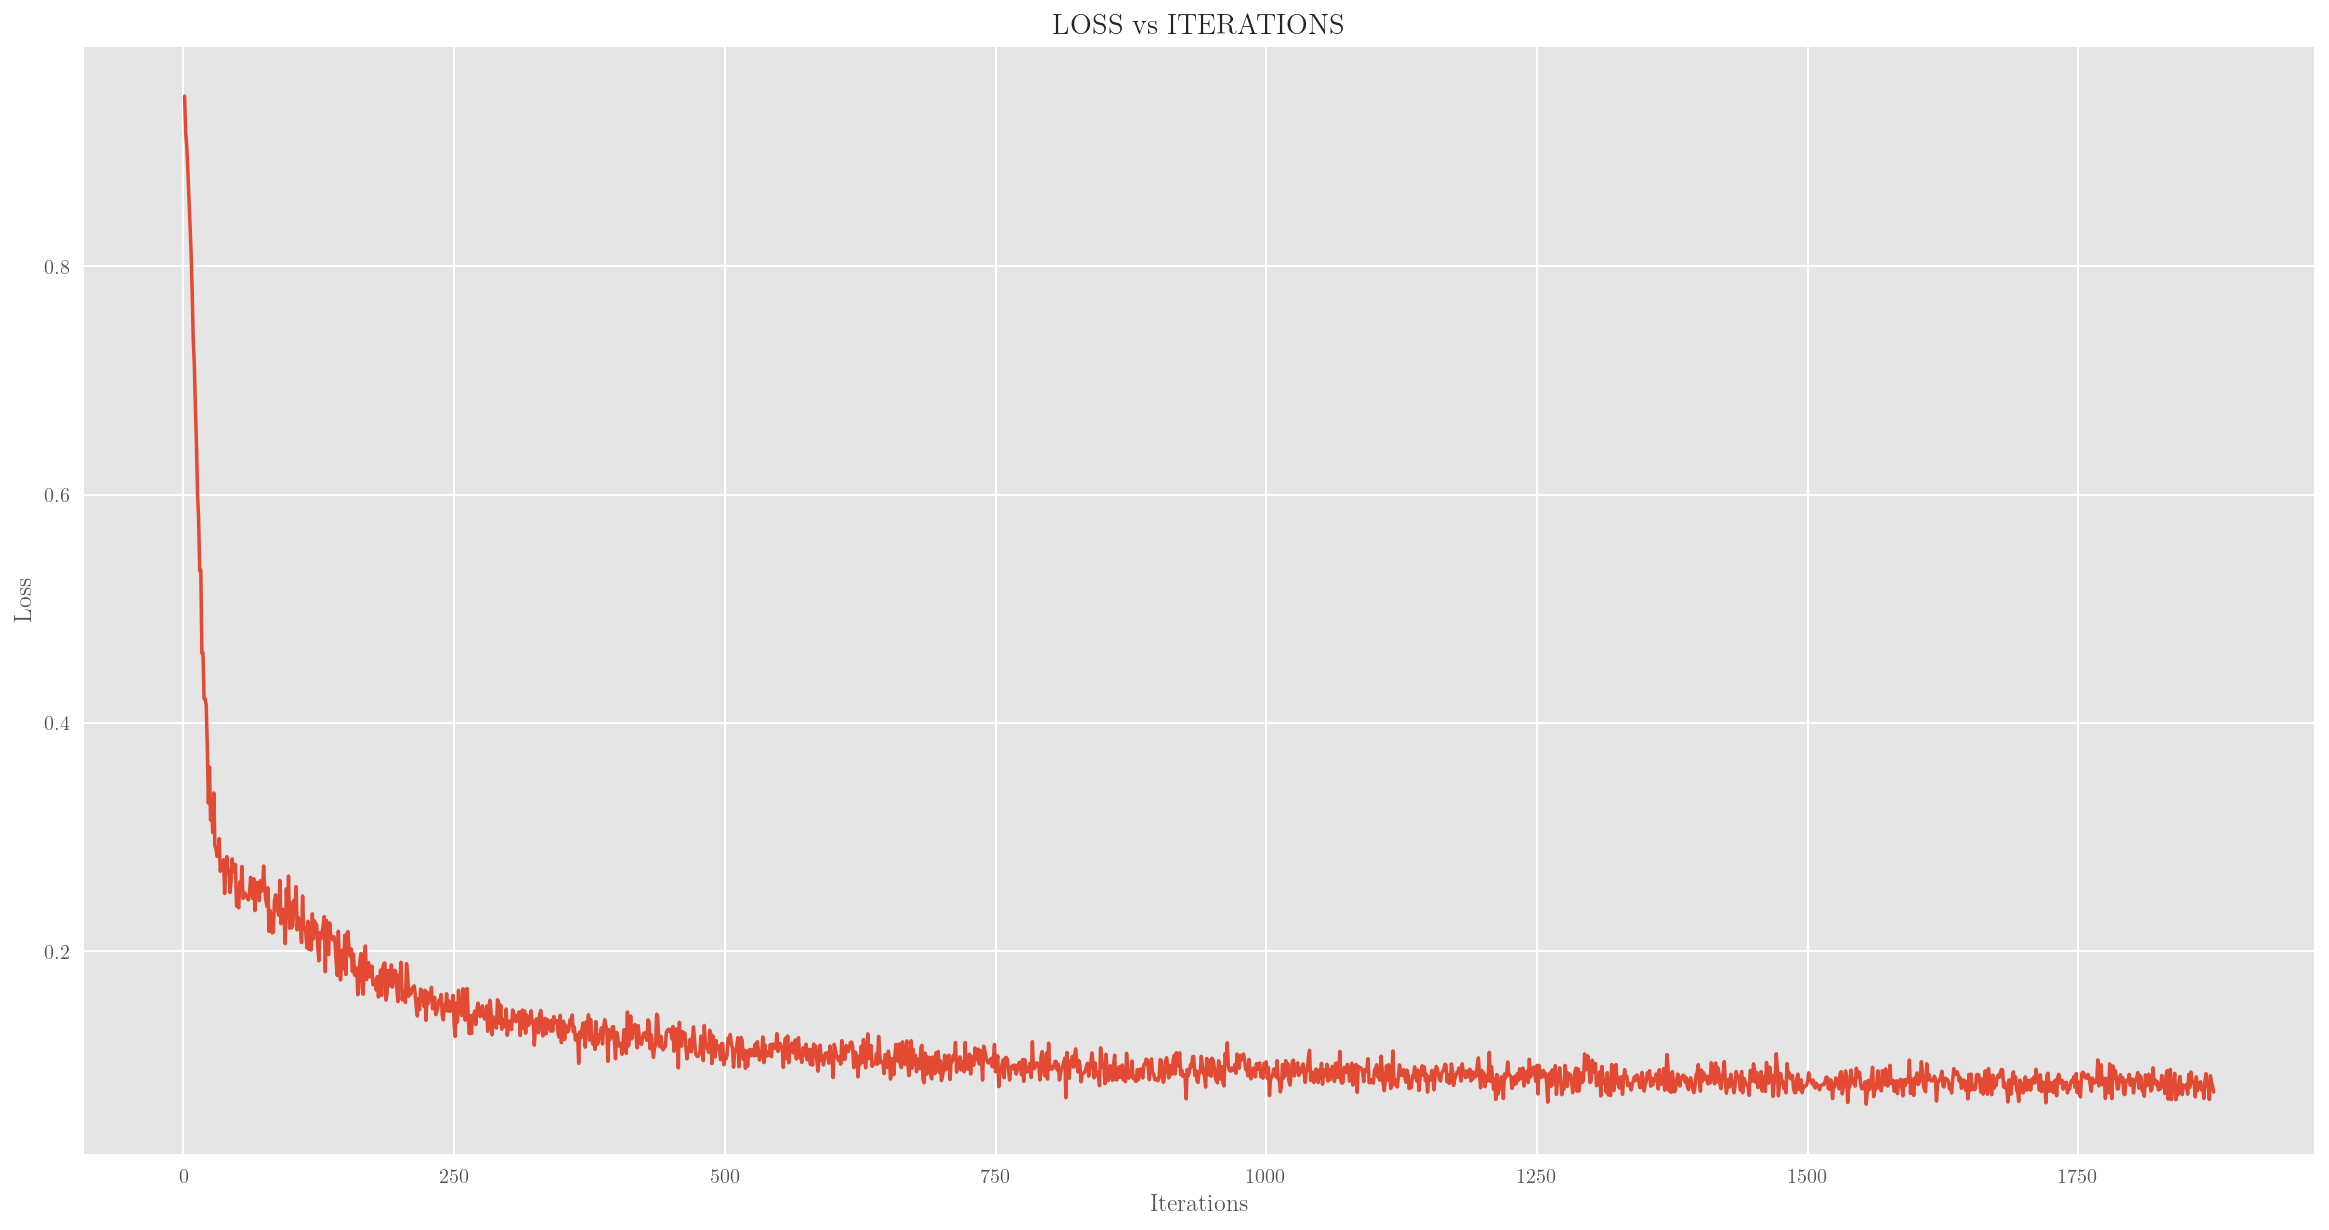

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
ae.plot_loss();

### Visualize the results

Let us now compare some mini-batches of the original MNIST digit images to their reconstructed counterparts, after putting them through our trained autoencoder.

We are considering only the last 3 mini-batches of the training.

In [6]:
original_images = [
                  
                  f'./output_images/original_{epochs-1}_1599.png',
                  f'./output_images/original_{epochs-1}_1699.png',
                  f'./output_images/original_{epochs-1}_1799.png']
reconstructed_images = [
                  
                  f'./output_images/image_{epochs-1}_1599.png',
                  f'./output_images/image_{epochs-1}_1699.png',
                  f'./output_images/image_{epochs-1}_1799.png'
]

ipyplot.plot_images(original_images, labels=['1', '2', '3', '4', '5'], img_width=300)
ipyplot.plot_images(reconstructed_images, labels=['1', '2', '3', '4', '5'], img_width=300)


### Save the autoencoder

Let us now save the autoencoder for use later, in order to either encode or decode data.



## HOMEWORK

### Play with the autoencoder

Create variants of the autoencoder, and see how the image reconstruction performance changes:

* first, reduce the latent-space dimensionality, and see the effect
* how small can this dimensionality be, before the reconstructed image degrades unacceptably?
* how does adding more hidden layers affect the autoencoder performance for image reconstruction? Try adding two hidden layers: `hidden_layers=[256, 32]` 
* what happens if you use different activation functions for the hidden layers?
* how does increasing the number of epochs affect the result?

### Experiment with different datasets

The `Fashion-MNIST` is a drop-in replacement of the `MNIST` digits dataset. Build an autoencoder with the `fashion-mnist` dataset, and play with the hyperparameters and layers of the autoencoder to see how things work out.

Next, try this on the `CIFAR10` and `CIFAR100` datasets.

# Denoising Autoencoders

Denoising autoencoders provide a more robust latent representation of the data. To train the denoising autoencoder, we superimpose noise over the input, but expect the output of the autoencoder to "learn" as much of the original input as possible. Thus the loss function remains the same, but we interject noise into the data at the input side.

From the manifold learning perspective, in essence, the autoencoder learns a latent manifold, such that point slightly "off" the manifold surface are nonetheless "pulled in" to the manifold. Owing to the robustness to perturbations of the input data, the denoising autoencoders tend to outperform the vanilla version. 


In [7]:
dae = DenoisingAutoencoder(28**2, 8, hidden_layers=[256, 64, 32])
print (dae)

DenoisingAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=8, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=784, bias=True)
    (7): Tanh()
  )
  (loss_function): MSELoss()
)
	Input-Dimension:         784
	Hidden Layer Dimensions: [256, 64, 32]
	Latent Dimension:        8


## Train the denoising autoencoder

In [8]:
epochs=1

dae.train(epochs=epochs, output_dir = './noisy/')

sequence:  1875 epoch [ 1 of   1], loss:0.1175
Finished training the autoencoder.


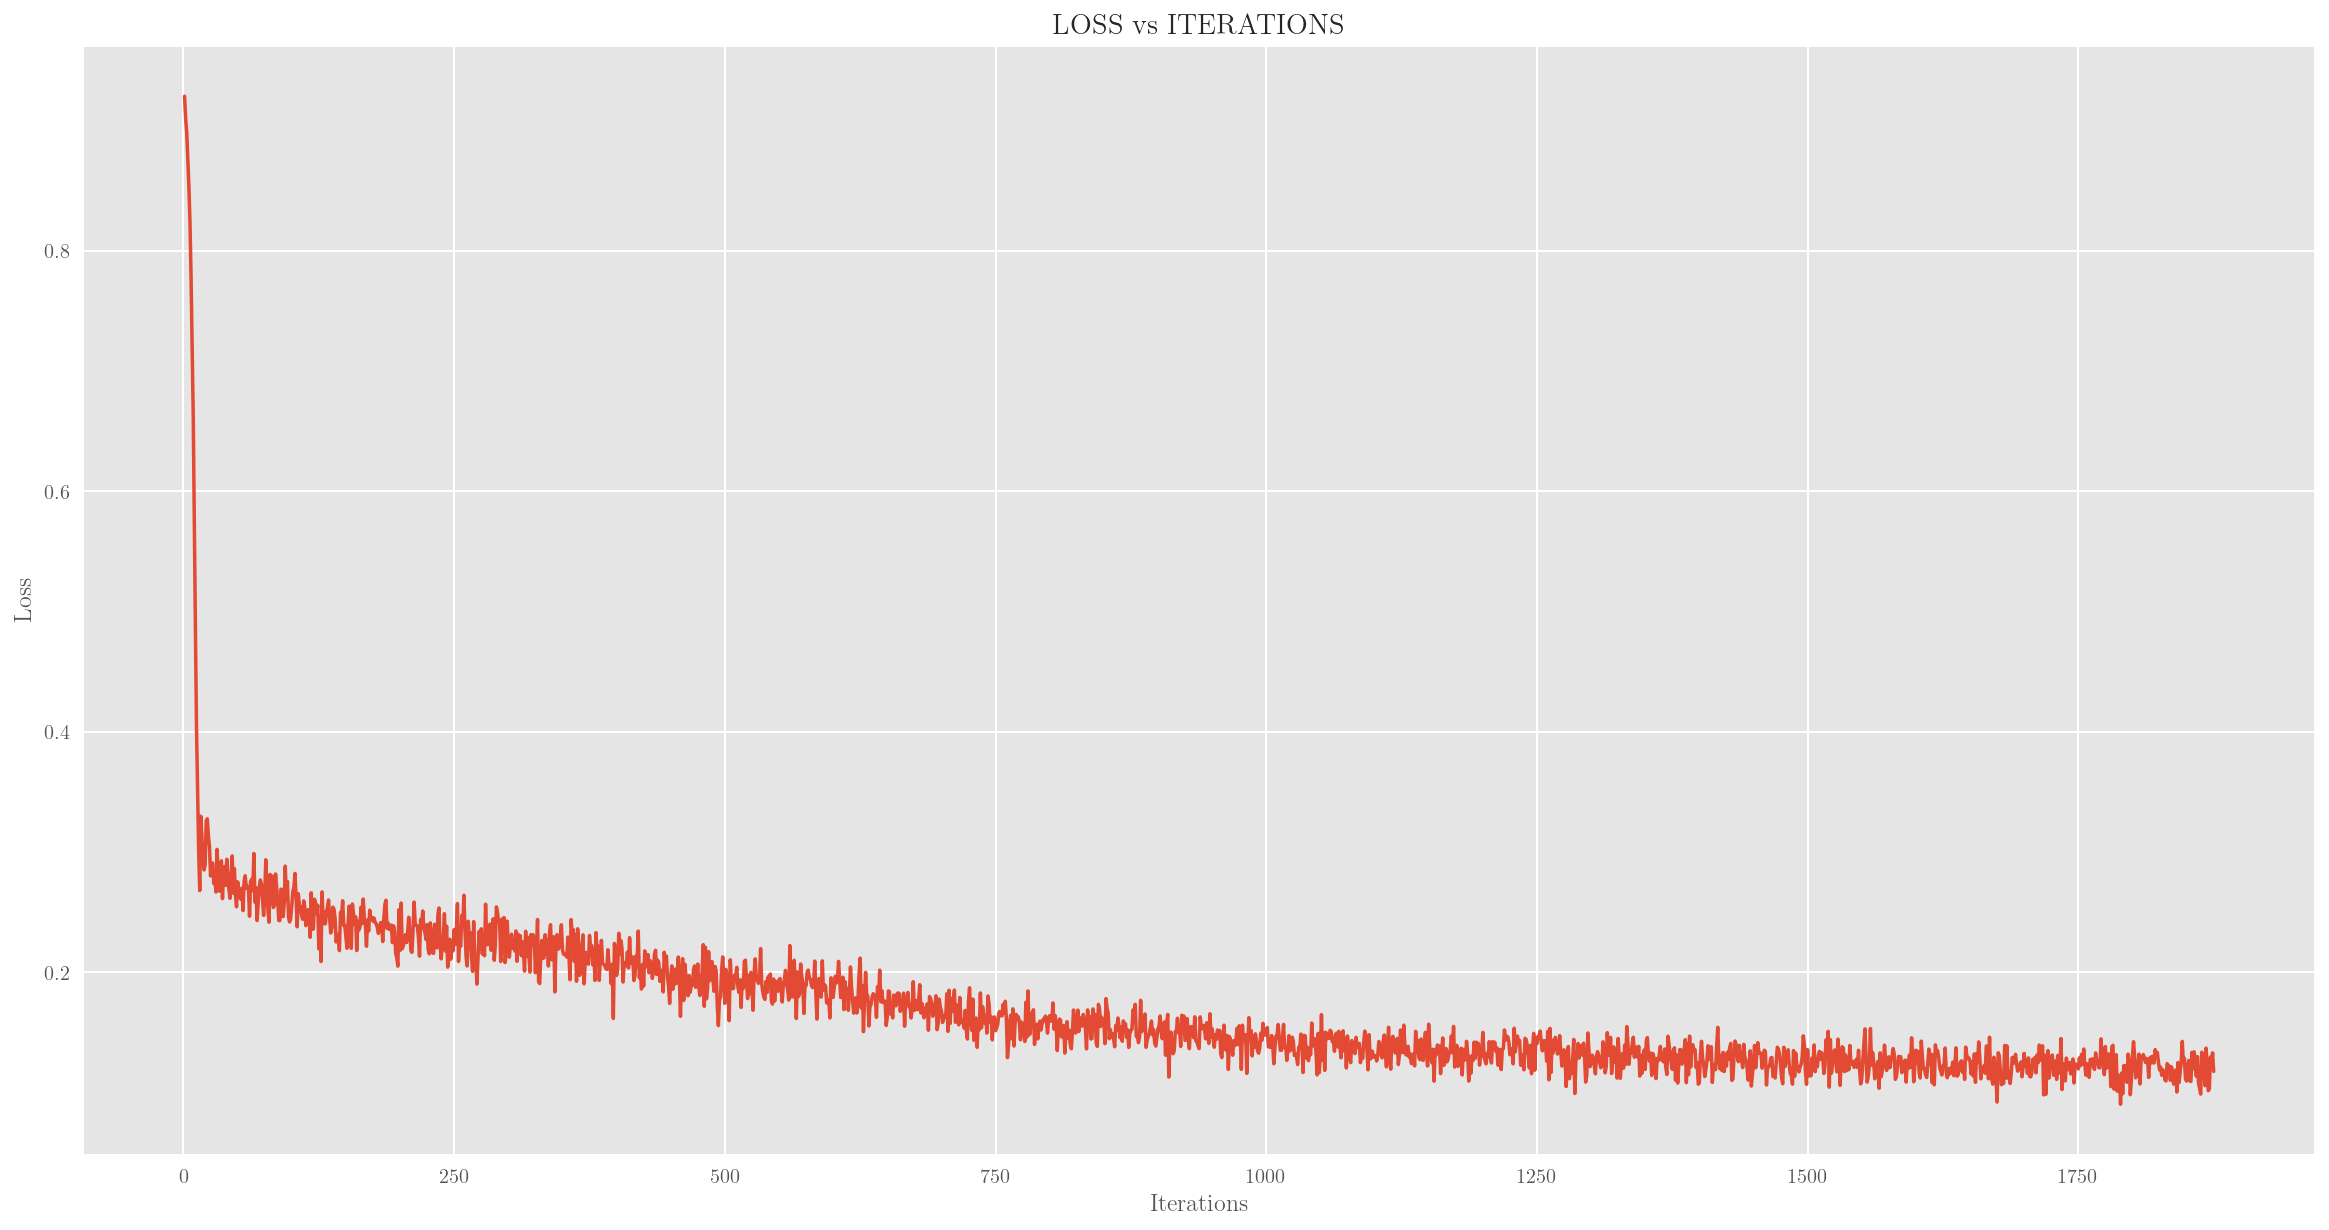

In [9]:

plt.figure(figsize=(20, 10))
dae.plot_loss();

## Visualize the results

In [10]:
original_images = [
                  
                  f'./noisy/original_{epochs-1}_1599.png',
                  f'./noisy/original_{epochs-1}_1699.png',
                  f'./noisy/original_{epochs-1}_1799.png']

noisy_images= [
                  
                  f'./noisy/noisy_{epochs-1}_1599.png',
                  f'./noisy/noisy_{epochs-1}_1699.png',
                  f'./noisy/noisy_{epochs-1}_1799.png']
reconstructed_images = [
                  
                  f'./noisy/image_{epochs-1}_1599.png',
                  f'./noisy/image_{epochs-1}_1699.png',
                  f'./noisy/image_{epochs-1}_1799.png'
]

ipyplot.plot_images(original_images, labels=['1', '2', '3', '4', '5'], img_width=300)
ipyplot.plot_images(noisy_images, labels=['1', '2', '3', '4', '5'], img_width=300)
ipyplot.plot_images(reconstructed_images, labels=['1', '2', '3', '4', '5'], img_width=300)

# Convolutional Autoencoder

One can build an autoencoder out of convolutional layers, especially when dealing with visual data. Read the class `svlearn.autoencoder.ConvAutoencoder` and see this is done.

In [11]:
cae = ConvAutoencoder()
print(cae.encoder)

Since no hidden layers were provided, one hidden layer of size:16 has been added
Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
)


In [12]:
epochs=1

cae.train(epochs=epochs, output_dir = './conv/')

sequence:  1875 epoch [ 1 of   1], loss:0.0206
Finished training the autoencoder.


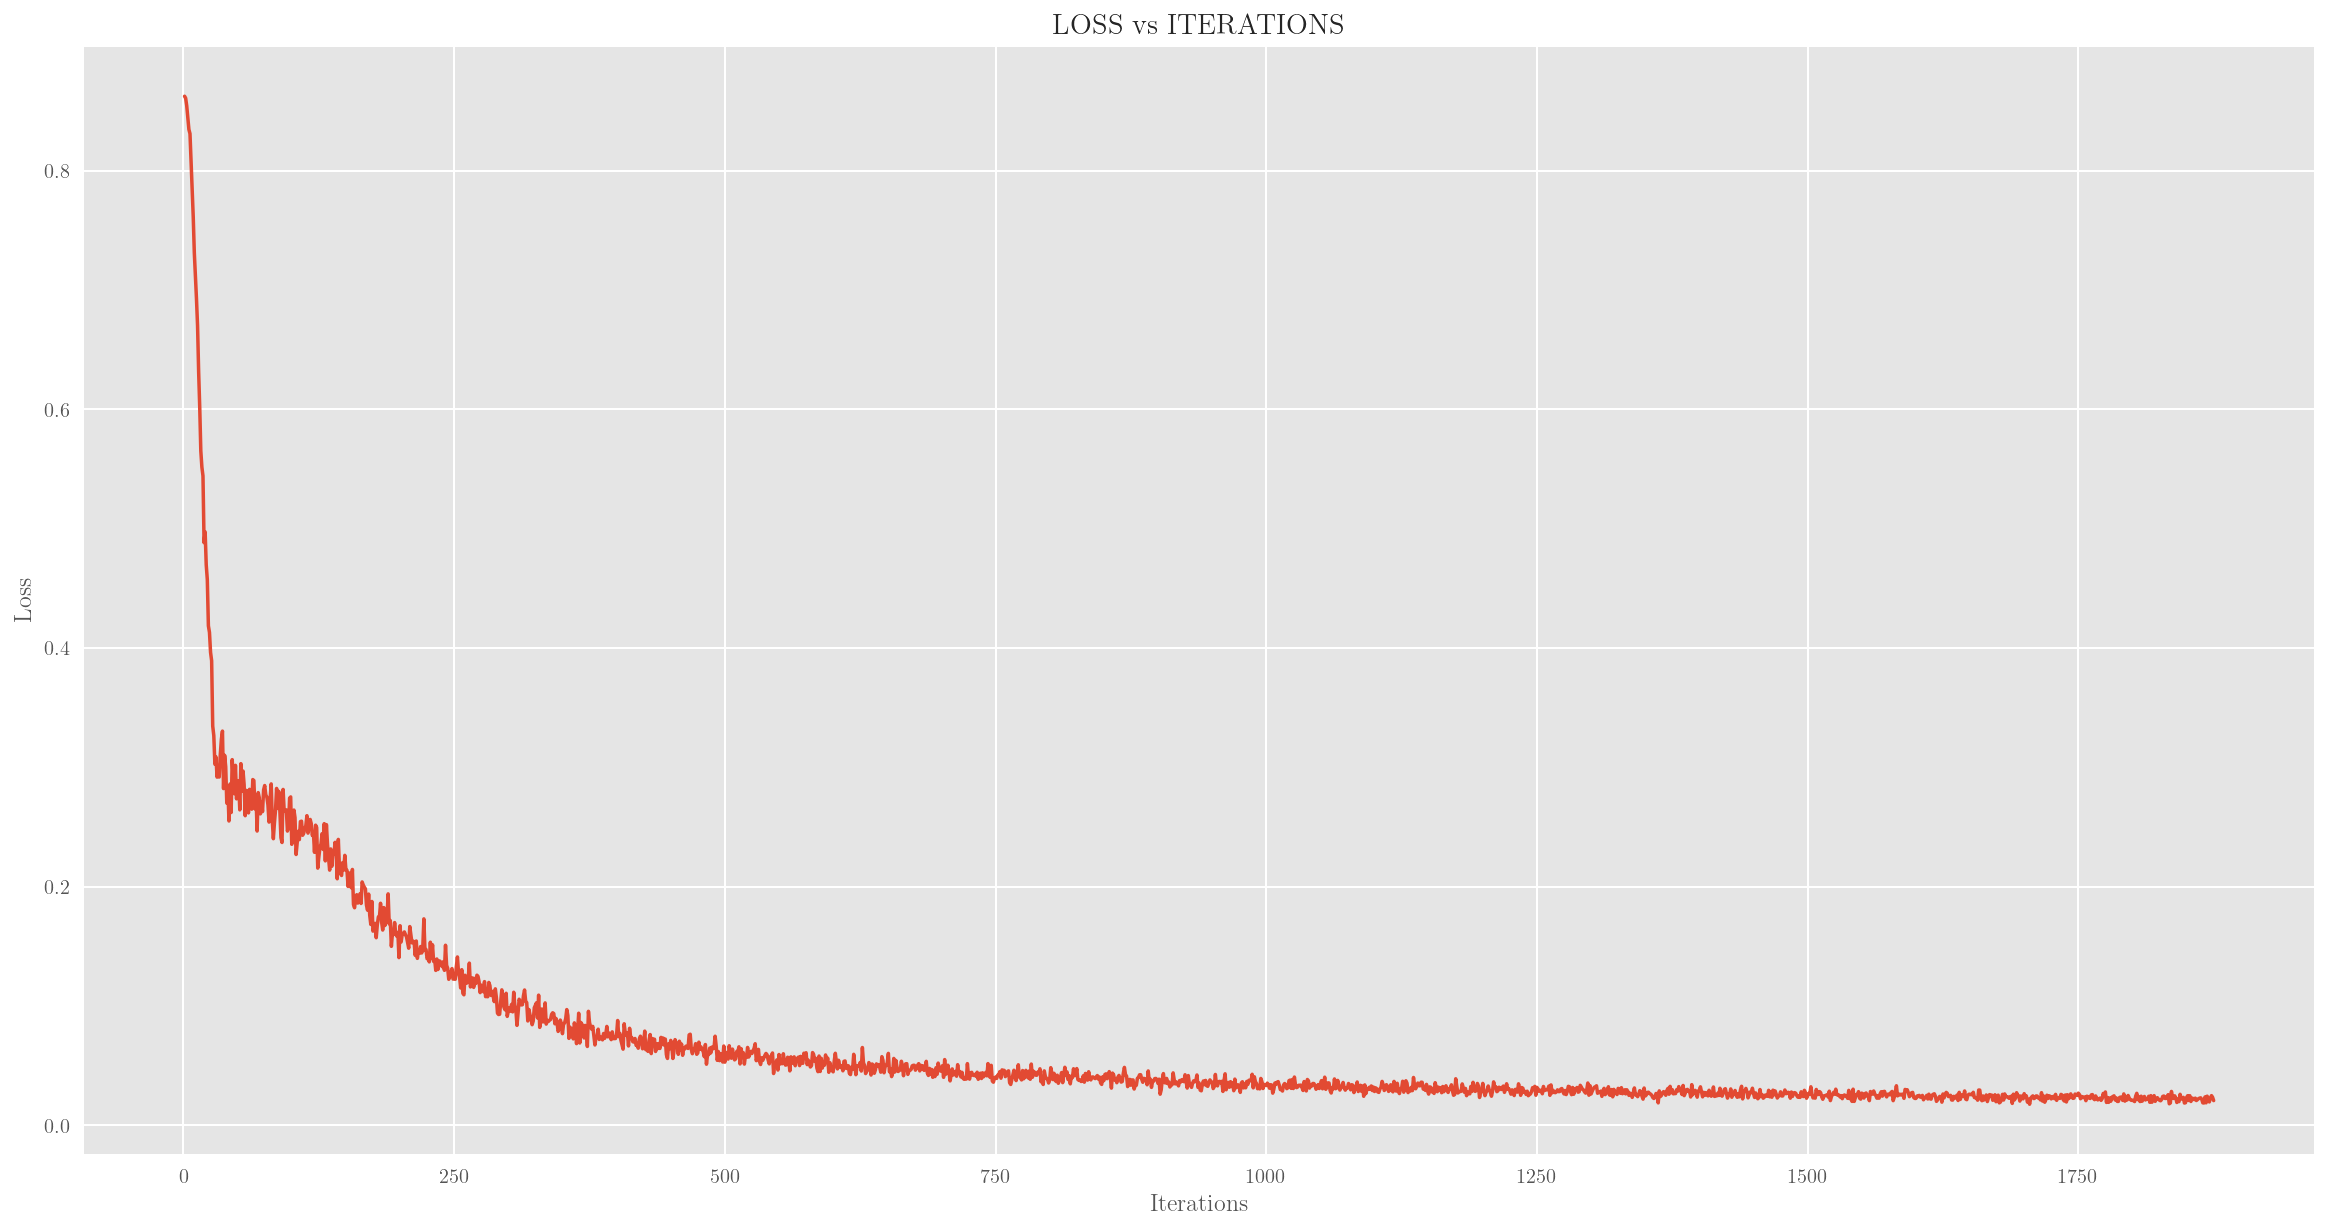

In [13]:
plt.figure(figsize=(20, 10))
cae.plot_loss();

In [24]:
original_images = [
        
                  f'./conv/original_{epochs-1}_1599.png',
                  f'./conv/original_{epochs-1}_1699.png',
                  f'./conv/original_{epochs-1}_1799.png']
reconstructed_images = [
                  
                  f'./conv/image_{epochs-1}_1599.png',
                  f'./conv/image_{epochs-1}_1699.png',
                  f'./conv/image_{epochs-1}_1799.png'
]

ipyplot.plot_images(original_images, labels=['1', '2', '3', '4', '5'], img_width=300)
ipyplot.plot_images(reconstructed_images, labels=['1', '2', '3', '4', '5'], img_width=300)

## Denoising version of the convolutional autoencoder

Let us consider now how the denoising version of this convolutional autoencoder does.

In [15]:
dcae = DenoisingConvAutoencoder()
print(dcae.encoder)

Since no hidden layers were provided, one hidden layer of size:16 has been added
Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
)


### Train the autoencoder

In [25]:
epochs=3

dcae.train(epochs=epochs, output_dir = './noisy-conv/')

sequence:  1875 epoch [ 1 of   3], loss:0.1064
sequence:  3750 epoch [ 2 of   3], loss:0.1021
sequence:  5625 epoch [ 3 of   3], loss:0.1024
Finished training the autoencoder.


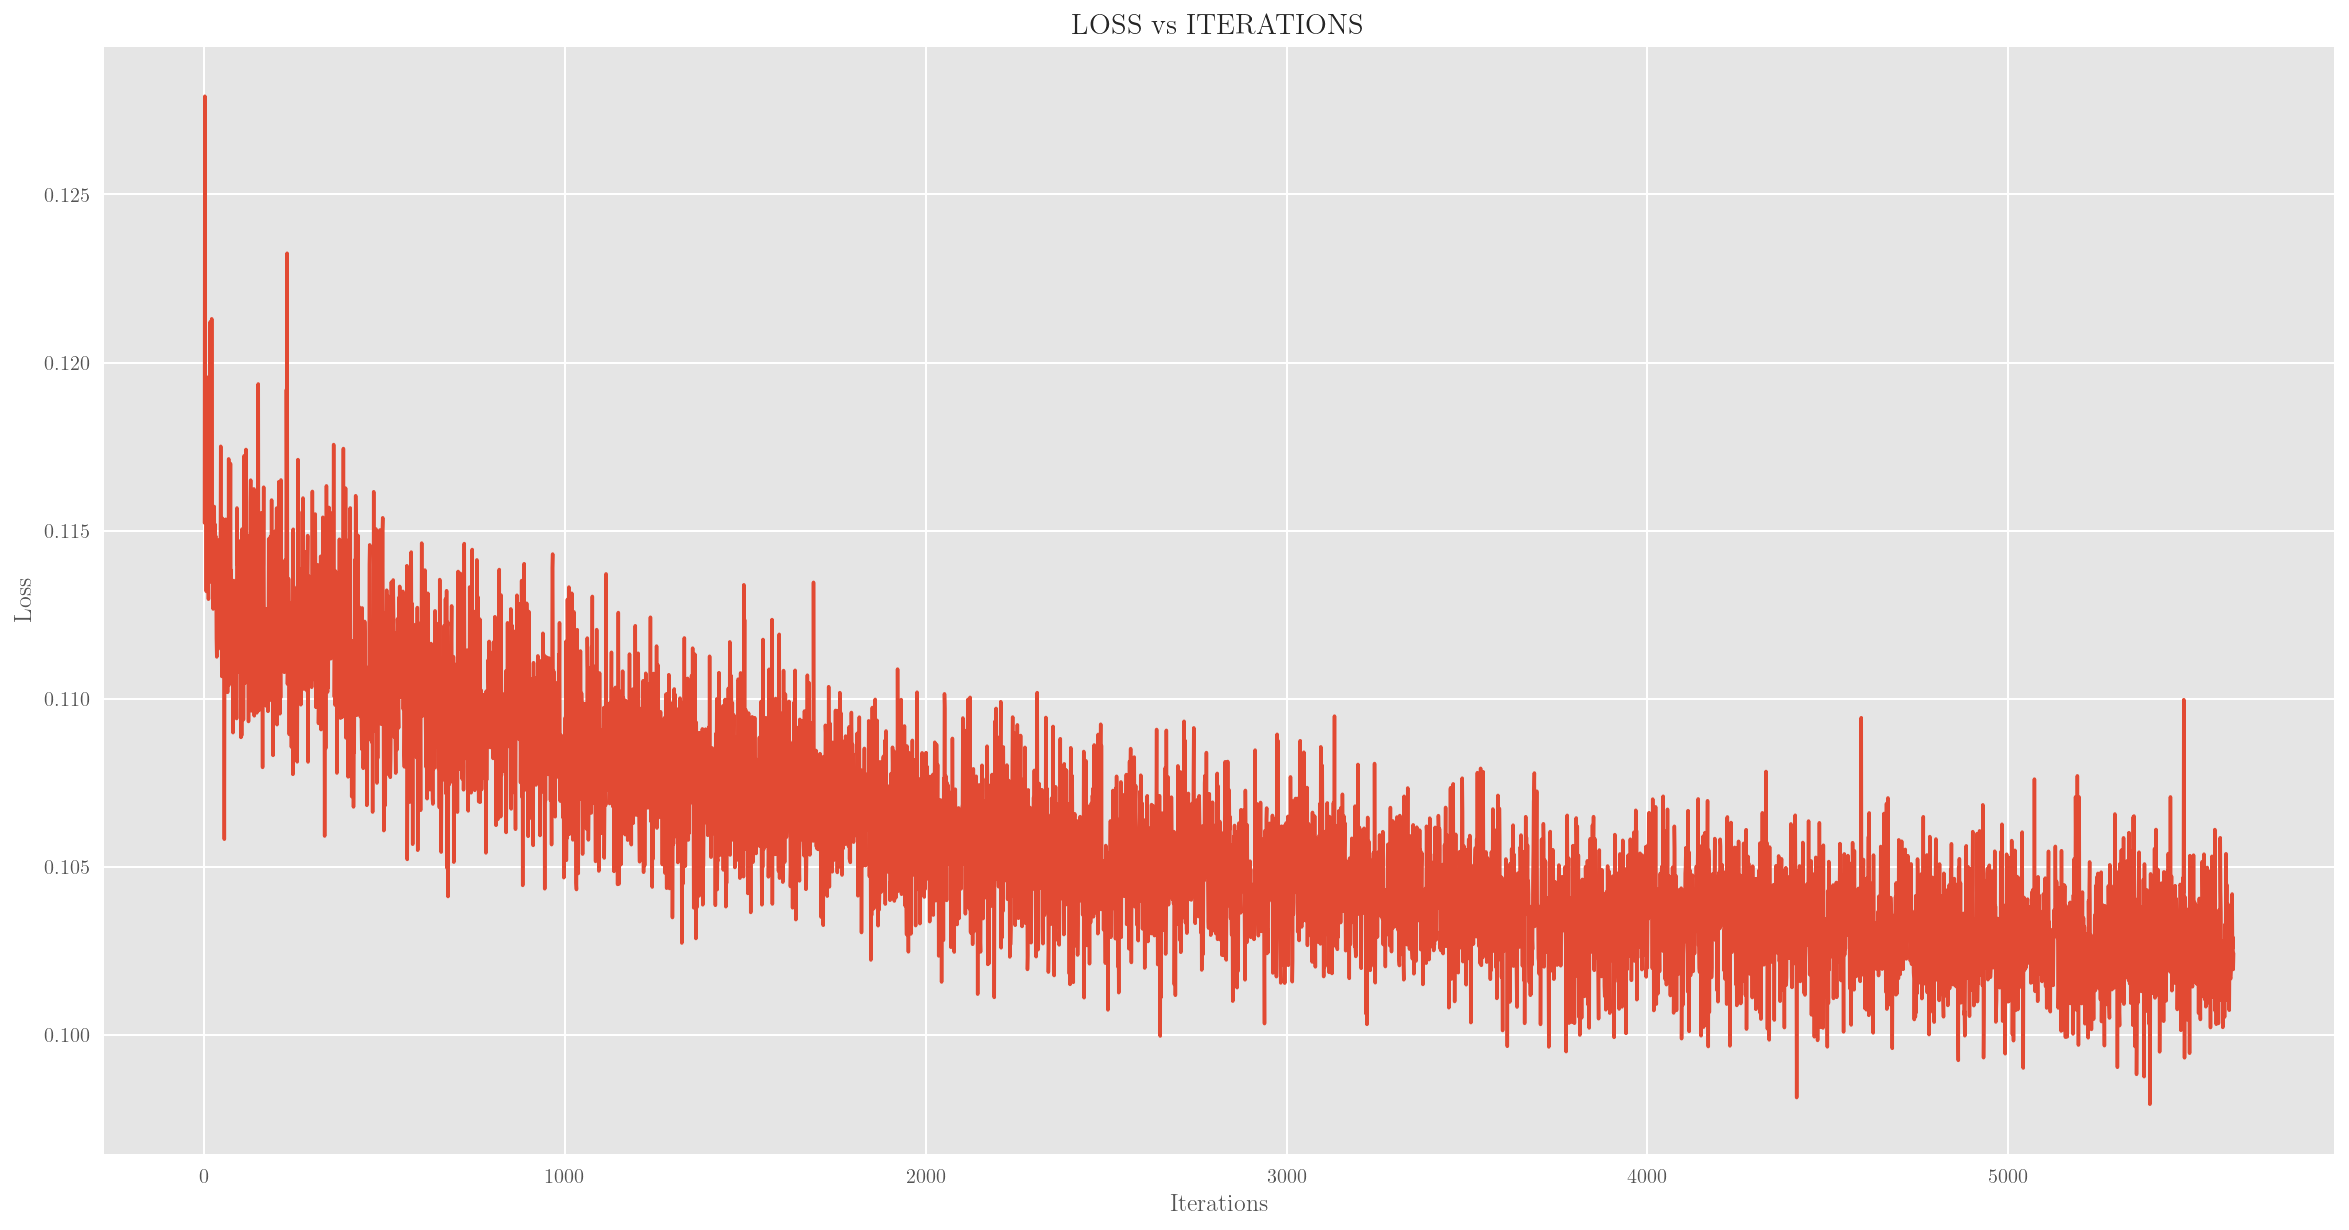

In [26]:

plt.figure(figsize=(20, 10))
dcae.plot_loss();

### Visualize the results

In [28]:
original_images = [
                  
                  f'./noisy-conv/original_{epochs-1}_1649.png',
                  f'./noisy-conv/original_{epochs-1}_1749.png',
                  f'./noisy-conv/original_{epochs-1}_1849.png']

noisy_images= [
                  
                  f'./noisy-conv/noisy_{epochs-1}_1649.png',
                  f'./noisy-conv/noisy_{epochs-1}_1749.png',
                  f'./noisy-conv/noisy_{epochs-1}_1849.png']
reconstructed_images = [
                  
                  f'./noisy-conv/image_{epochs-1}_1649.png',
                  f'./noisy-conv/image_{epochs-1}_1749.png',
                  f'./noisy-conv/image_{epochs-1}_1849.png'
]

ipyplot.plot_images(original_images, labels=['1', '2', '3', '4', '5'], img_width=300)
ipyplot.plot_images(noisy_images, labels=['1', '2', '3', '4', '5'], img_width=300)
ipyplot.plot_images(reconstructed_images, labels=['1', '2', '3', '4', '5'], img_width=300)

# Variational Autoencoder

In [19]:
from svlearn.autoencoder.vae import VariationalAutoencoder
# # import wandb
# # wandb.init()

In [20]:
epochs=1

vae = VariationalAutoencoder(28**2, 128,)
print(vae.encoder)
vae.train(epochs=epochs)

Since no hidden layers were provided, one hidden layer of size:256 has been added
Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
)
Finished training the autoencoder.


In [21]:
# import wandb
# wandb.init()
# vae = VariationalAutoencoder(28**2, 8, hidden_layers=[256, 64, 32])
# vae.train(epochs=5)

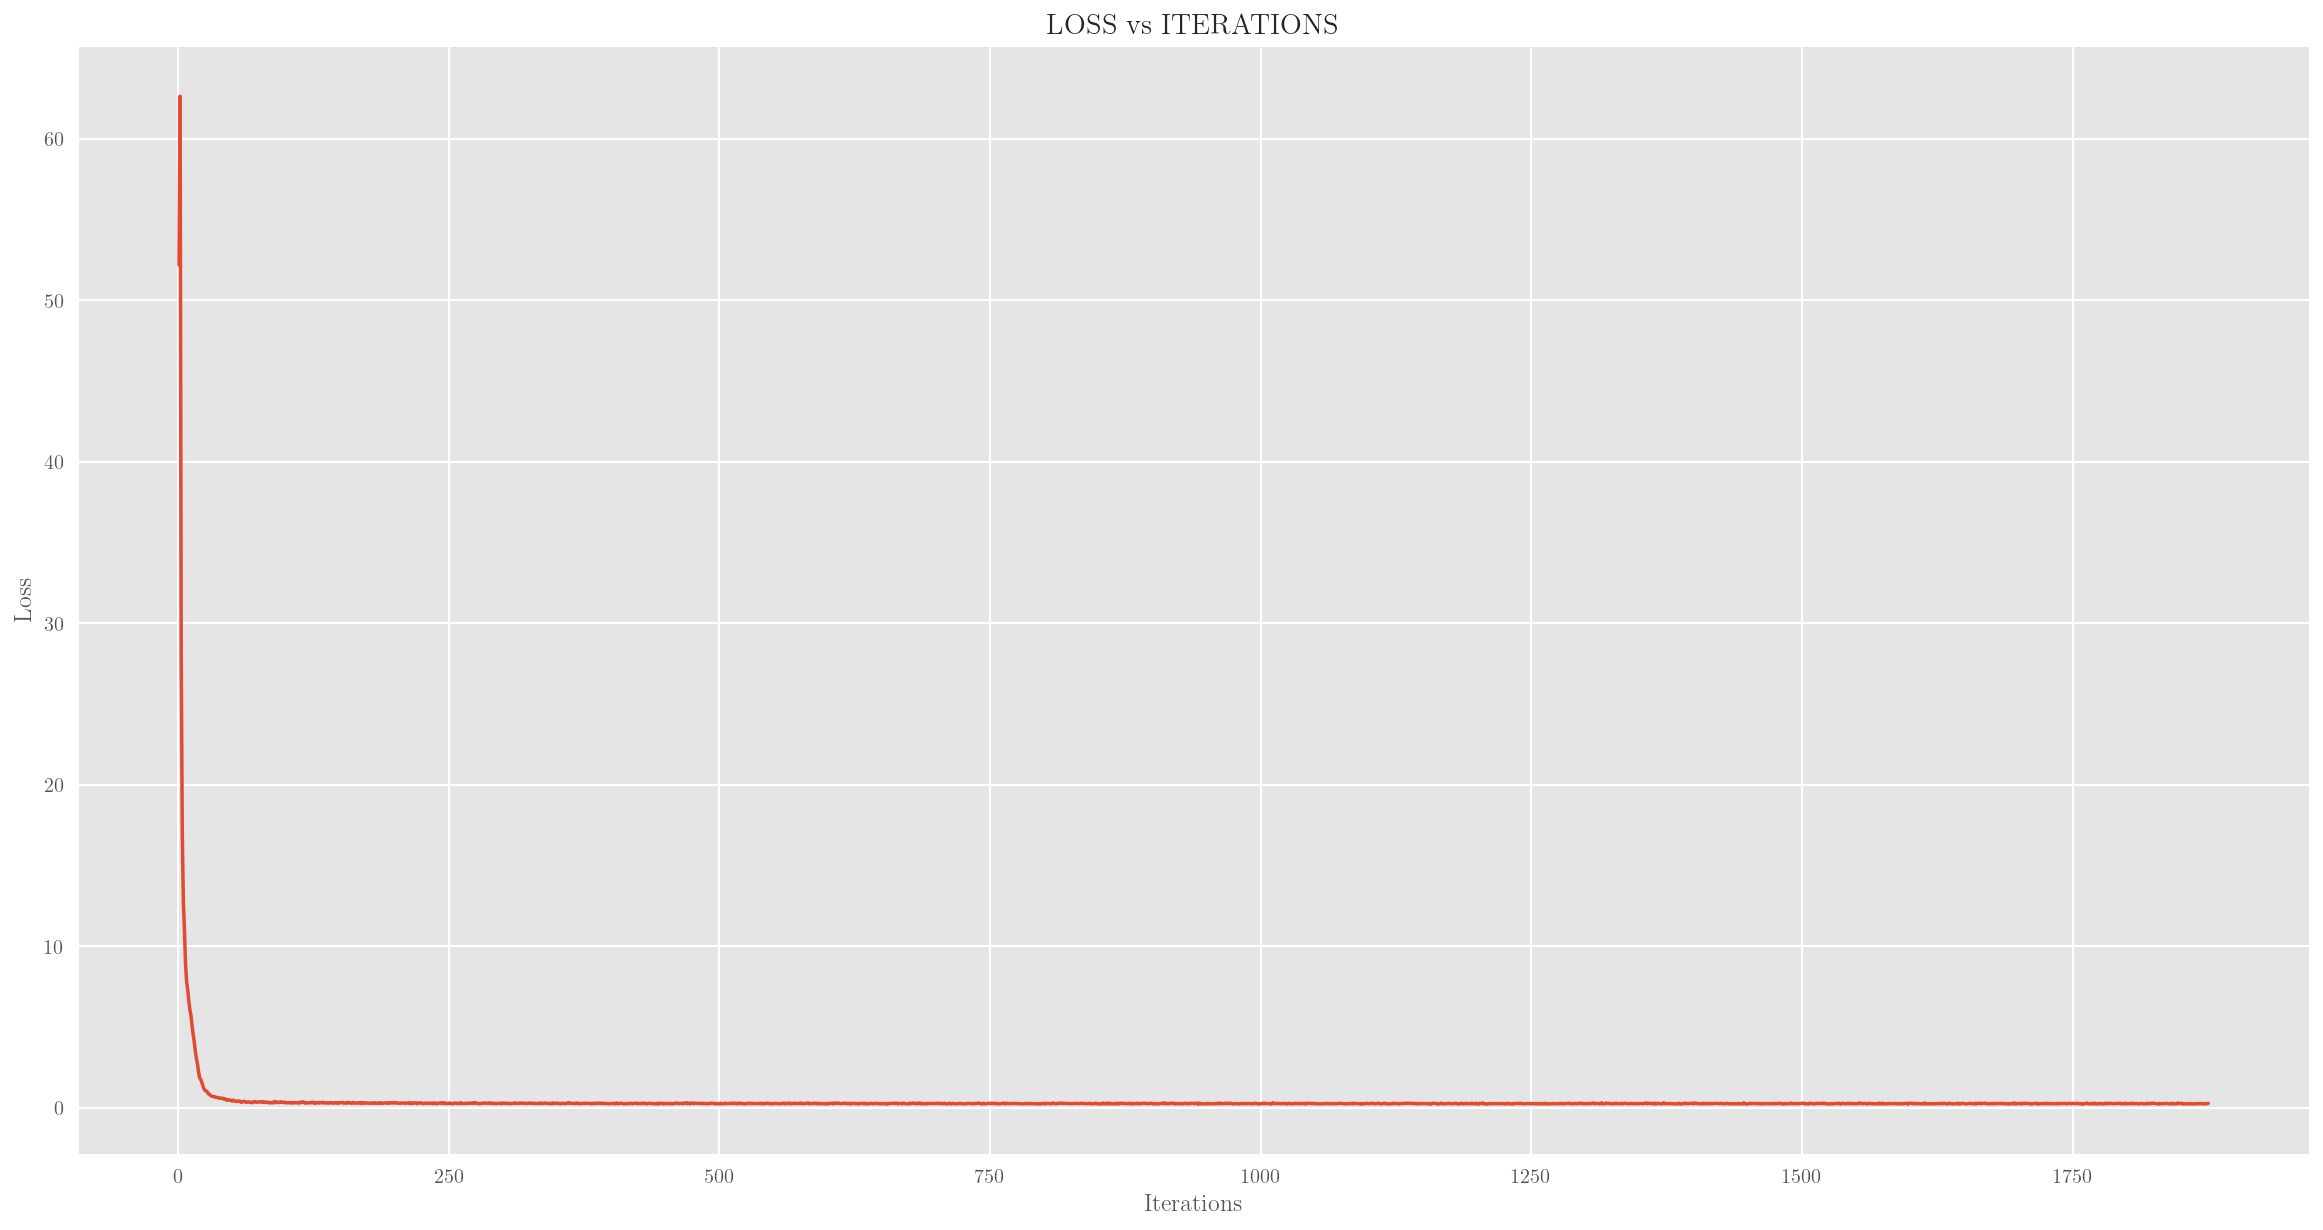

In [22]:
plt.figure(figsize=(20, 10))
vae.plot_loss();

In [23]:
original_images = [
        
                  f'./output_images/original_{epochs-1}_1600.png',
                  f'./output_images/original_{epochs-1}_1700.png',
                  f'./output_images/original_{epochs-1}_1800.png']
reconstructed_images = [
                  
                  f'./output_images/image_{epochs-1}_1600.png',
                  f'./output_images/image_{epochs-1}_1700.png',
                  f'./output_images/image_{epochs-1}_1800.png'
]

ipyplot.plot_images(original_images, labels=['1', '2', '3', '4', '5'], img_width=300)
ipyplot.plot_images(reconstructed_images, labels=['1', '2', '3', '4', '5'], img_width=300)